### Final

In [1]:
import pandas as pd
import numpy as np
import os

### Loading energy data file  Energy Indicators.xls

In [2]:
energy=pd.read_excel(r'C:\Users\anoop\Desktop\python programs\Data Analysis\Energy Indicators.xls',skiprows=17,skipfooter=38,na_values='...')
energy.drop(['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)
energy.columns=['Country','Energy Supply','Energy Supply per Capita','% Renewable']
energy['Energy Supply']=energy['Energy Supply']*1000000
#energy.set_index('Country1',inplace=True)
energy['Country'].replace({'Republic of Korea':'South Korea','United States of America':'United States','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','China, Hong Kong Special Administrative Region':'Hong Kong'},inplace=True)
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


Function to clean country names

In [3]:
def clean(row):
    if row['Country'].isalpha():
        return row
    elif row['Country'].isalnum() or '(' in row['Country']:
        for i in range(len(row['Country'])):
            if row['Country'][i].isdigit() or row['Country'][i]=='(':
                row['Country']=row['Country'][:i]
                #print(row['Country'])
                return row
    else:
        return row

In [4]:
energy=energy.apply(clean,axis=1)

### Loading GDP data, World_Bank.csv 

In [5]:

GDP=pd.read_csv(r'C:\Users\anoop\Desktop\python programs\Data Analysis\World_Bank.csv',skiprows=4)
GDP.rename(columns={'Country Name':'Country'},inplace=True)
GDP['Country'].replace({'Korea, Rep.': 'South Korea','Iran, Islamic Rep.':'Iran','Hong Kong SAR, China':'Hong Kong'},inplace=True)
GDP=GDP.apply(clean,axis=1)
GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


### Loading Education data scimagojr-3.xlsx

In [6]:
scimEn=pd.read_excel(r'C:\Users\anoop\Desktop\python programs\Data Analysis\scimagojr-3.xlsx',headers=0)

merge1=pd.merge(energy,GDP[['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']],how='outer',left_on='Country',right_on='Country')
scimagojr=pd.merge(scimEn.head(15),merge1,how='inner',on='Country')
scimagojr.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,China,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
1,2,United States,96661,94747,792274,265436,8.20,230,NaN,NaN,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
2,3,Japan,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,NaN,NaN,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
4,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


Q. How much had the GDP changed over the 10 year span for the country with 6th largest avg GDP

In [7]:
GDP1=scimagojr.copy()
GDP1['Avg GDP']=GDP1[['2006','2007','2008','2009','2010','2011','2012','2013','2015']].apply(np.average,axis=1)
GDP1.sort_values('Avg GDP',ascending=False,inplace=True)
print('The change in GDP for',GDP1['Country'].iloc[5],'(which has the 6th largest avg GDP) =',GDP1['2015'].iloc[5]-GDP1['2006'].iloc[5])


The change in GDP for United Kingdom (which has the 6th largest avg GDP) = 246702696075.3999


Q. Mean of Energy Supply per Capita

In [8]:
print('Mean of Energy Supply per Capita = {:.2f}'.format(np.mean(scimagojr["Energy Supply per Capita"])))

Mean of Energy Supply per Capita = 152.92


Q. Counrty with highest amount of % Renewable energy

In [9]:
print(scimagojr['Country'].iloc[scimagojr['% Renewable'].idxmax()], 'has highest amount of % Renewable Energy with',np.max(scimagojr['% Renewable']),'%')

Brazil has highest amount of % Renewable Energy with 69.64803 %


Creating new column with a ratio and find max of it and return a tuple with country with max and max ratio

In [10]:
new=scimagojr.copy()
new['Self:Total Citations']= new['Self-citations']/new['Citations']
new[['Citations','Self-citations','Self:Total Citations']].head()

,Citations,Self-citations,Self:Total Citations
0,597237,411683,0.689313
1,792274,265436,0.335031
2,223024,61554,0.275997
3,206091,37874,0.183773
4,34266,12422,0.362517


In [11]:
citmax=(new['Country'].iloc[np.argmax(new['Self:Total Citations'])],'{:.5f}'.format(np.max(new['Self:Total Citations'])))
print('Country with max self:total citations and the max value are',citmax)

Country with max self:total citations and the max value are ('China', '0.68931')


C:\Users\anoop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Q.Corelation

In [12]:
scimagojr['PopEst']=scimagojr["Energy Supply"]/scimagojr['Energy Supply per Capita']
scimagojr['Citations per Capita']=scimagojr['Citations']/scimagojr['PopEst']
print('corelation',scimagojr[["Energy Supply per Capita",'Citations per Capita']].corr().loc['Citations per Capita','Energy Supply per Capita'])

corelation 0.7443592662858144


Function and .apply()

In [13]:
def sort_mid(df,med):
    if df['% Renewable'] >= med:
        df['HighRenew']=1
        return df
    else:
        df['HighRenew']=0
        return df


In [14]:
scimagojr=scimagojr.apply(sort_mid,med=scimagojr['% Renewable'].median(),axis=1)
scimagojr.sort_values('Rank',ascending=True)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2009,2010,2011,2012,2013,2014,2015,PopEst,Citations per Capita,HighRenew
0,1,China,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,0.000437,1
1,2,United States,96661,94747,792274,265436,8.20,230,NaN,NaN,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,NaN,NaN,0
2,3,Japan,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.274094e+08,0.001750,0
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,NaN,NaN,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,NaN,NaN,0
4,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.435000e+08,0.000239,0
5,6,Canada,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,...,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,3.523986e+07,0.006101,1
6,7,Germany,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,...,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,8.036970e+07,0.001749,1
7,8,India,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,...,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.276731e+09,0.000101,0
8,9,France,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,...,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,6.383735e+07,0.002046,0
9,10,South Korea,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,...,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,4.980543e+07,0.002302,0


Merging a series to a DF and Group by Continents

In [15]:
continentdict={'China':'Asia','United States':'North America','Japan':'Asia','United Kingdom':'Europe','Russian Federation':'Europe','Canada':'North America','Germany':'Europe','India':'Asia','France':'Europe','South Korea':'Asia','Italy':'Europe','Spain':'Europe','Iran':'Asia','Australia':'Australia','Brazil':'South America'}
cont=pd.Series(continentdict,name='Continent')
scimagojr=scimagojr.merge(cont.to_frame(),how='inner',left_on='Country',right_index=True) #merging a named series to df. .to_frame() can also be used to convert series to a data frame
scibin=scimagojr.groupby('Continent').agg({'PopEst':[np.size,np.sum,np.mean,np.std]})
scibin.head()

PopEst                                          
                size           sum          mean           std
Continent                                                     
Asia             5.0  2.821591e+09  7.053977e+08  7.138779e+08
Australia        1.0  2.331602e+07  2.331602e+07           NaN
Europe           6.0  3.940587e+08  7.881174e+07  3.813228e+07
North America    2.0  3.523986e+07  3.523986e+07           NaN
South America    1.0  2.059153e+08  2.059153e+08           NaN

.dropna() and Cut

In [16]:
binn=scimagojr[['Country','Continent','% Renewable']].copy()
binn['% Renewable']=pd.cut(binn['% Renewable'],bins=5)
binn.dropna(axis=0,inplace=True)
binn=binn.groupby(['Continent','% Renewable']).count() #columns inside groupby become indices and function is applied upon other columns
binn.dropna(inplace=True)
#binn is the required df
binn.head()


Country
Continent % Renewable              
Asia      (2.212, 15.753]       3.0
          (15.753, 29.227]      1.0
Australia (2.212, 15.753]       1.0
Europe    (15.753, 29.227]      3.0
          (29.227, 42.701]      2.0

In [17]:
try:
    scimagojr.astype({'PopESt':'float64'})
except:
    print(scimagojr.PopEst.dtype)


float64


### Matplotlib

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib notebook

## Plotting two subplots in a fig 
(just for practice, not a meaningful graph)

<IPython.core.display.Javascript object>


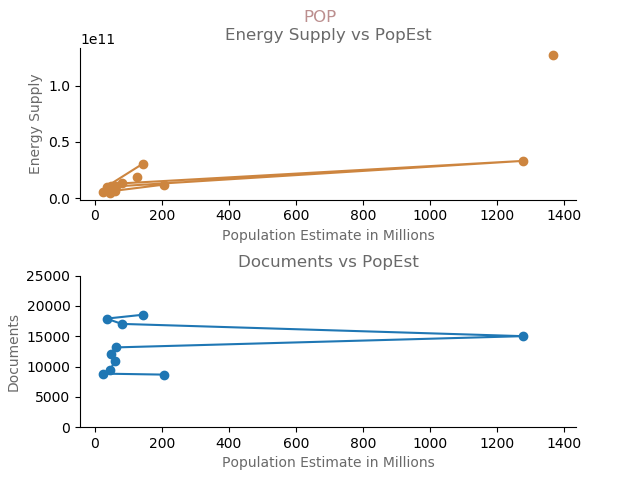

Text(0.5, 1.0, 'Energy Supply vs PopEst')

In [20]:
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.plot(scimagojr['PopEst']/1000000,scimagojr['Energy Supply'],'-o',c='peru')
ax1.set_xlabel('Population Estimate in Millions',c='dimgray')
ax1.set_ylabel('Energy Supply',c='dimgray')
ax1.set_title('Energy Supply vs PopEst',c='dimgray')

In [21]:
ax2.plot(scimagojr['PopEst']/1000000,scimagojr['Documents'],'-o')
ax2.set_ylim(0,25000)
ax2.set_xlabel('Population Estimate in Millions',c='dimgray')
ax2.set_ylabel('Documents',c='dimgray')
ax2.set_title('Documents vs PopEst',c='dimgray')
fig.suptitle('POP',c='rosybrown')

Text(0.5, 0.98, 'POP')

## Controlling the axis visibility

In [22]:
i=1
for spine1,spine2 in zip(ax1.spines.values(),ax2.spines.values()):
    if i%2 ==0:
        spine1.set_visible(False)
        spine2.set_visible(False)
    i=i+1

Adjust Subplots

In [23]:
#plt.tight_layout()
plt.subplots_adjust(top=0.90,hspace=0.5)
plt.show()

In [24]:
scicont=scimagojr.groupby('Continent').agg({'PopEst':np.sum})

## Plotting 2 bar charts in same figure with removal of chart junk 


<IPython.core.display.Javascript object>


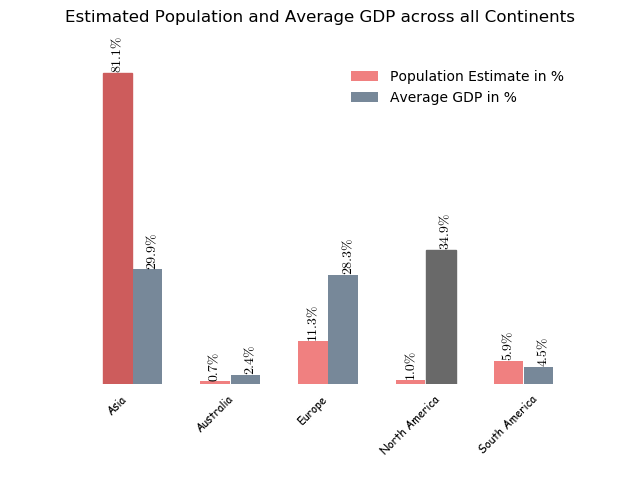

In [25]:
fig2,ax=plt.subplots(1,1)
bars=ax.bar(scicont.index.values.tolist(),(scicont['PopEst']*100)/np.sum(scicont['PopEst']),width=0.3,color='lightcoral')

*The Population for Asia(Largest) and the GDP for North America (Largest GDP) are highlighted using a slightly different colors

Spine(axis) Removal

In [26]:
for spine in ax.spines.values():
    spine.set_visible(False)

Tick_params tweaking

In [27]:
ax.tick_params(which='both',left=False,right=False,labelright=False,labelleft=False,top=False,bottom=False,rotation=45)
plt.subplots_adjust(bottom=0.2)

In [28]:
for tick in ax.get_xticklabels():
    tick.set_fontname("Comic Sans MS")
    tick.set_fontsize(8)

In [29]:
fig2.suptitle('Estimated Population and Average GDP across all Continents')

Text(0.5, 0.98, 'Estimated Population and Average GDP across all Continents')

## Adding text by position and text from bar

In [30]:
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2,bar.get_height()+1,str(round(float(bar.get_height()),1))+'%',ha='center',color='k',fontsize=10,rotation=90,fontname='cmr10')

New X values for second graph

In [31]:
newx=[]
for bar in bars:
    a=bar.get_x()+0.46
    newx.append(a)

In [32]:
scimagojr['Avg GDP']=scimagojr[['2006','2007','2008','2009','2010','2011','2012','2013','2015']].apply(np.average,axis=1)
GDPc=scimagojr.groupby('Continent').agg({'Avg GDP':np.sum})

Plotting second bar graph on same graph

In [33]:
gdp= ax.bar(newx,(GDPc['Avg GDP']*100)/np.sum(GDPc['Avg GDP']),width=0.3,color='lightslategrey')
gdp[3].set_color('dimgray')

Adding text by position and text from bar

In [34]:
for bar in gdp:
    ax.text(bar.get_x()+bar.get_width()/2+0.05,bar.get_height()+1,str(round(float(bar.get_height()),1))+'%',ha='center',color='k',fontsize=10,rotation=90,fontname='cmr10')

Legend plotting

In [35]:
plt.legend(['Population Estimate in %','Average GDP in %'], loc=1,frameon=False)
bars[0].set_color('indianred')
#plt.savefig('GDP vs Population')
plt.show()

The Population for Asia(Largest) and the GDP for North America (Largest GDP) are highlighted using a slightly different colors